In [1]:
import pandas as pd
import numpy as np
from numpy import where
import collections
from collections import Counter
import sklearn
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score

In [2]:
ush17=pd.read_csv('/Users/mac/Desktop/TFG/data/tables/US/household/2017/ahs2017n.csv')

In [3]:
for col in ush17.columns:
    print(col)

CONTROL
TOTROOMS
PERPOVLVL
COMTYPE
COMCOST
JACPRIMARY
JACSECNDRY
JADEQUACY
JBATHEXCLU
JBATHROOMS
JBEDROOMS
JBIKE
JBLD
JBUS
JCARPOOL
JCELLPHONE
JCOLD
JCOLDCOST
JCOLDEQ
JCOLDEQFREQ
JCOLDHTCAP
JCOLDINSUL
JCOLDOTHER
JCOLDUTIL
JCOMCOST
JCOMDAYS
JCOMPANYCAR
JCOMTYPE
JCONDO
JCOOKFUEL
JCOOKTYPE
JDBEVICLK
JDBEVICNOTE
JDBEVICTHT
JDBEVICWHERE
JDBFORCWHR
JDBLVEFORC
JDBMISSMORT
JDBMISSRENT
JDBUTBILL
JDINING
JDISHH
JDISHWASH
JDIST
JDPALTCOM
JDPDRFOOD
JDPEMWATER
JDPEVACPETS
JDPEVFIN
JDPEVINFO
JDPEVKIT
JDPEVLOC
JDPEVSEP
JDPEVVEHIC
JDPFLDINS
JDPGENERT
JDPGETINFO
JDPMAJDIS
JDPSHELTR
JDRIVEALL
JDRIVEPART
JDRYER
JDWNPAYPCT
JELECAMT
JENTRYSYS
JFERRY
JFINCP
JFINROOMS
JFIREPLACE
JFIRSTHOME
JFLOORHOLE
JFNDCRUMB
JFOUNDTYPE
JFRIDGE
JFS
JFUSEBLOW
JGARAGE
JGASAMT
JGRANDHH
JGUTREHB
JHEATFUEL
JHEATTYPE
JHHADLTKIDS
JHHAGE
JHHCARE
JHHCITSHP
JHHENROLL
JHHERRND
JHHGRAD
JHHHEAR
JHHINUSYR
JHHMAR
JHHMEMRY
JHHMOVE
JHHNATVTY
JHHOLDKIDS
JHHRACE
JHHRACEAS
JHHRACEPI
JHHSEE
JHHSEX
JHHSPAN
JHHWALK
JHHYNGKIDS
JHINCP
JHMRACCESS
JH

In [4]:
var17=ush17[['JBLD','JGARAGE','JPORCH','JBATHEXCLU','JBATHROOMS','JBEDROOMS','JDINING','JKITCHENS','JKITEXCLU','JTOTROOMS','JUNITFLOORS','JUNITSIZE','JADEQUACY','JUPKEEP','JHSHLDTYPE','JHHGRAD','JHHRACE','JFINCP','JHINCP','JPERPOVLVL','JNEARABAND','JNEARBARCL','JNEARTRASH','JRATINGHS','JRATINGNH']]
var17

,JBLD,JGARAGE,JPORCH,JBATHEXCLU,JBATHROOMS,JBEDROOMS,JDINING,JKITCHENS,JKITEXCLU,JTOTROOMS,...,JHHGRAD,JHHRACE,JFINCP,JHINCP,JPERPOVLVL,JNEARABAND,JNEARBARCL,JNEARTRASH,JRATINGHS,JRATINGNH
0,'0','0','0','0','0','0','0','0','0','1',...,'0','0','0','1','0','0','0','0','0','0'
1,'0','0','0','0','0','0','0','0','0','1',...,'0','0','0','1','0','0','0','0','0','0'
2,'0','0','0','0','0','0','0','0','0','0',...,'0','0','0','1','0','0','0','0','0','0'
3,'0','0','0','0','0','0','0','0','0','1',...,'0','0','0','1','0','0','0','0','0','0'
4,'0','0','0','0','0','0','0','0','0','1',...,'0','0','0','1','0','0','0','0','0','0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66747,'0','0','0','0','0','0','0','0','0','0',...,'0','0','0','0','0','0','0','0','0','0'
66748,'0','0','0','0','0','0','0','0','0','1',...,'0','0','0','0','0','0','0','0','0','0'
66749,'0','0','0','0','0','0','0','0','0','0',...,'0','0','2','3','0','0','0','0','0','0'
66750,'1','0','0','0','0','0','0','0','0','1',...,'0','0','0','0','0','0','0','0','0','0'


In [5]:
var17 = var17.apply(lambda x: pd.to_numeric(x.astype(str).str.replace('[^0-9]', ''), errors='coerce'))

print(var17)

/var/folders/vj/crlt_wk5433clrm0qp9q9f3w0000gn/T/ipykernel_20227/4067524168.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  var17 = var17.apply(lambda x: pd.to_numeric(x.astype(str).str.replace('[^0-9]', ''), errors='coerce'))


       JBLD  JGARAGE  JPORCH  JBATHEXCLU  JBATHROOMS  JBEDROOMS  JDINING  \
0         0        0       0           0           0          0        0   
1         0        0       0           0           0          0        0   
2         0        0       0           0           0          0        0   
3         0        0       0           0           0          0        0   
4         0        0       0           0           0          0        0   
...     ...      ...     ...         ...         ...        ...      ...   
66747     0        0       0           0           0          0        0   
66748     0        0       0           0           0          0        0   
66749     0        0       0           0           0          0        0   
66750     1        0       0           0           0          0        0   
66751     0        0       0           0           0          0        0   

       JKITCHENS  JKITEXCLU  JTOTROOMS  ...  JHHGRAD  JHHRACE  JFINCP  JHINCP  \
0     

In [6]:
var17[['JPERPOVLVL','JNEARABAND','JNEARBARCL','JNEARTRASH','JRATINGHS','JRATINGNH','JGARAGE','JBATHEXCLU']].value_counts()

JPERPOVLVL  JNEARABAND  JNEARBARCL  JNEARTRASH  JRATINGHS  JRATINGNH  JGARAGE  JBATHEXCLU
0           0           0           0           0          0          0        0             66729
                                                                               2                23
dtype: int64

In [7]:
var17.drop(['JPERPOVLVL','JNEARABAND','JNEARBARCL','JNEARTRASH','JRATINGHS','JRATINGNH','JGARAGE','JBATHEXCLU'], axis=1, inplace=True)

In [8]:
null_counts = var17.isna().sum()
print(null_counts)

JBLD           0
JPORCH         0
JBATHROOMS     0
JBEDROOMS      0
JDINING        0
JKITCHENS      0
JKITEXCLU      0
JTOTROOMS      0
JUNITFLOORS    0
JUNITSIZE      0
JADEQUACY      0
JUPKEEP        0
JHSHLDTYPE     0
JHHGRAD        0
JHHRACE        0
JFINCP         0
JHINCP         0
dtype: int64


In [9]:
print(var17.describe())

               JBLD        JPORCH    JBATHROOMS     JBEDROOMS       JDINING  \
count  66752.000000  66752.000000  66752.000000  66752.000000  66752.000000   
mean       0.075893      0.005798      0.166737      0.024928      0.034935   
std        0.369865      0.075921      0.460093      0.221891      0.262014   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        3.000000      1.000000      3.000000      2.000000      2.000000   

          JKITCHENS     JKITEXCLU     JTOTROOMS   JUNITFLOORS    JUNITSIZE  \
count  66752.000000  66752.000000  66752.000000  66752.000000  66752.00000   
mean       0.021572      0.008314      0.477379      0.023700      0.00024   
std        0.206591      0.090804      0.588879      0

In [10]:
var17.dtypes

JBLD           int64
JPORCH         int64
JBATHROOMS     int64
JBEDROOMS      int64
JDINING        int64
JKITCHENS      int64
JKITEXCLU      int64
JTOTROOMS      int64
JUNITFLOORS    int64
JUNITSIZE      int64
JADEQUACY      int64
JUPKEEP        int64
JHSHLDTYPE     int64
JHHGRAD        int64
JHHRACE        int64
JFINCP         int64
JHINCP         int64
dtype: object

                 JBLD    JPORCH  JBATHROOMS  JBEDROOMS   JDINING  JKITCHENS  \
JBLD         1.000000  0.030212    0.015610   0.011996  0.009742   0.011904   
JPORCH       0.030212  1.000000    0.310281   0.427169  0.420593   0.452402   
JBATHROOMS   0.015610  0.310281    1.000000   0.601727  0.565334   0.572109   
JBEDROOMS    0.011996  0.427169    0.601727   1.000000  0.760119   0.858881   
JDINING      0.009742  0.420593    0.565334   0.760119  1.000000   0.779830   
JKITCHENS    0.011904  0.452402    0.572109   0.858881  0.779830   1.000000   
JKITEXCLU    0.270260  0.129911    0.107382   0.129497  0.131356   0.137380   
JTOTROOMS   -0.089306  0.228612    0.265449   0.451224  0.526710   0.425647   
JUNITFLOORS  0.074742  0.326548    0.223594   0.292853  0.267355   0.302805   
JUNITSIZE    0.002056  0.011564    0.076420   0.111656  0.093967   0.120177   
JADEQUACY   -0.132731 -0.012036   -0.385657   0.009176 -0.019738   0.003779   
JUPKEEP      0.009522  0.307209    0.453907   0.4724

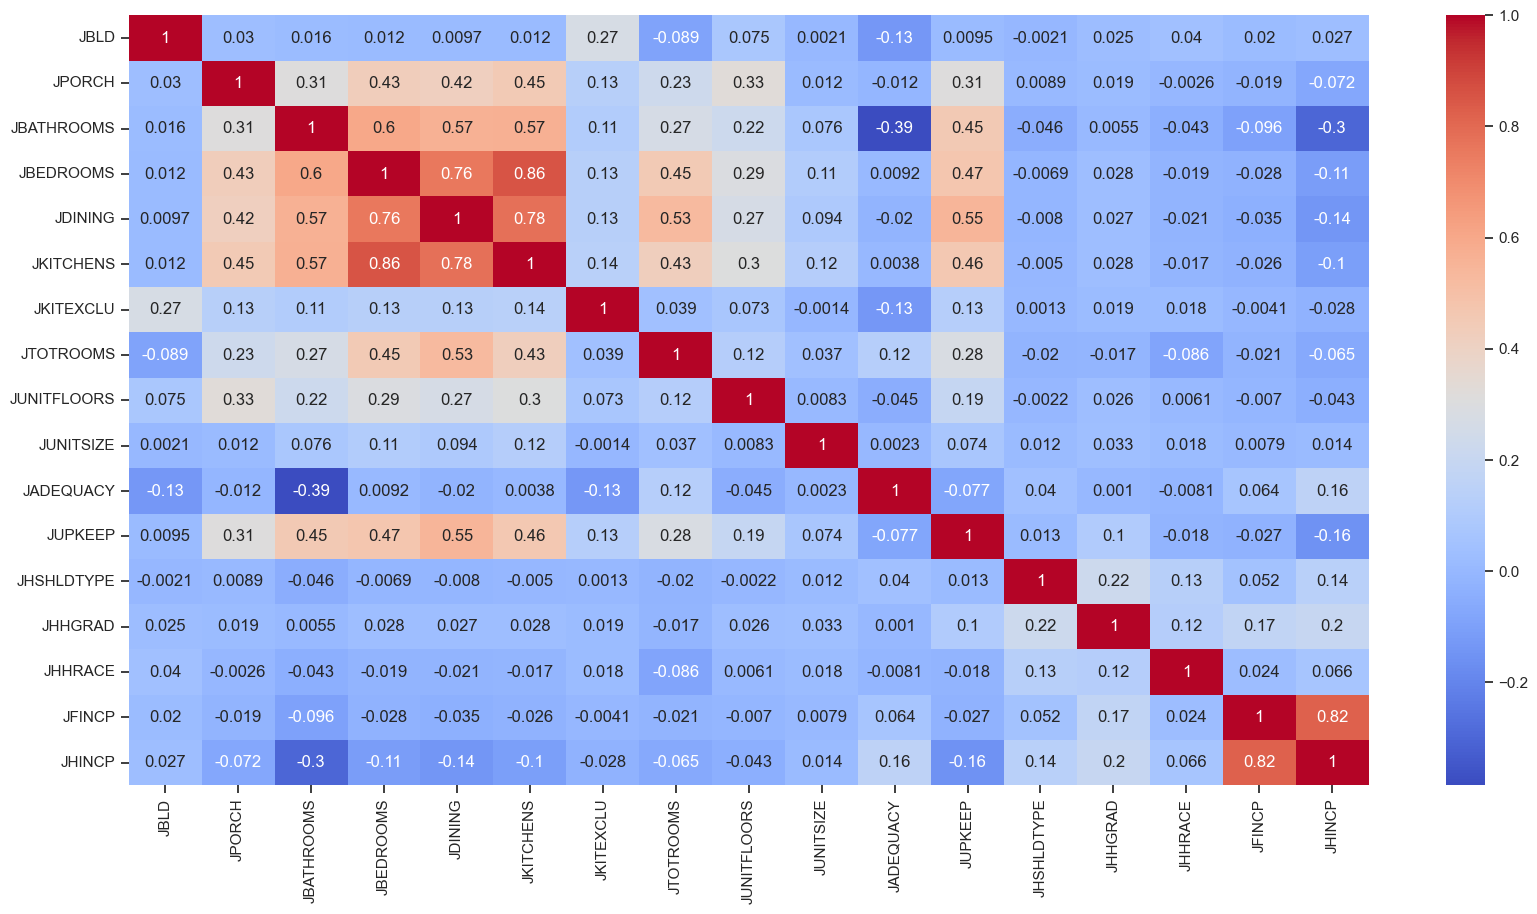

In [11]:
print(var17.corr())
sns.set(style="ticks")
plt.figure(figsize=(20,10))
sns.heatmap(var17.corr(), annot=True, cmap='coolwarm')
plt.show()

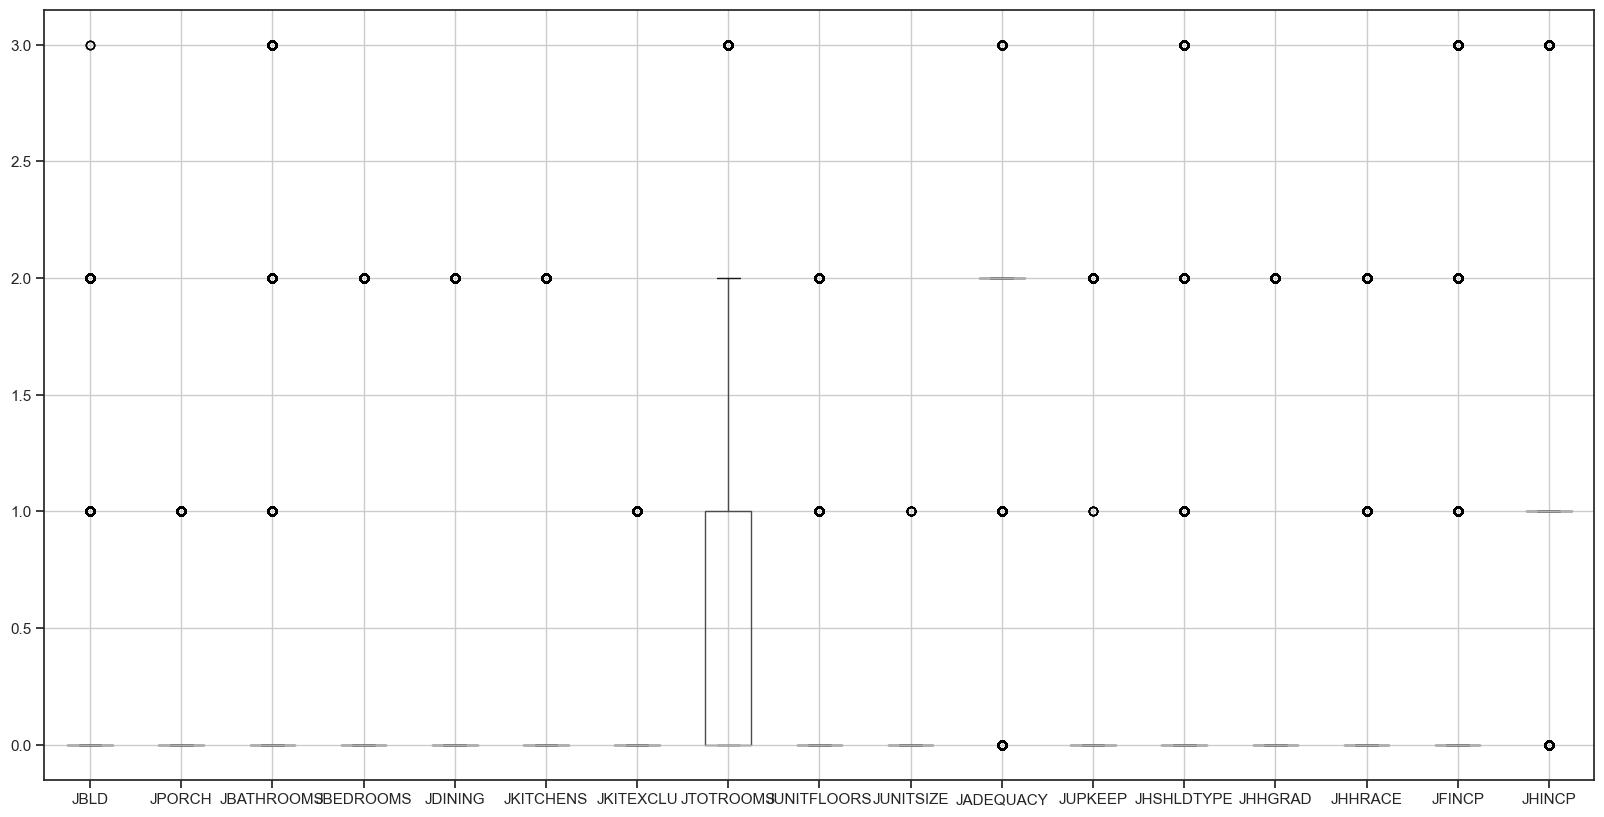

In [12]:
var17.boxplot(figsize=(20,10))
plt.show()

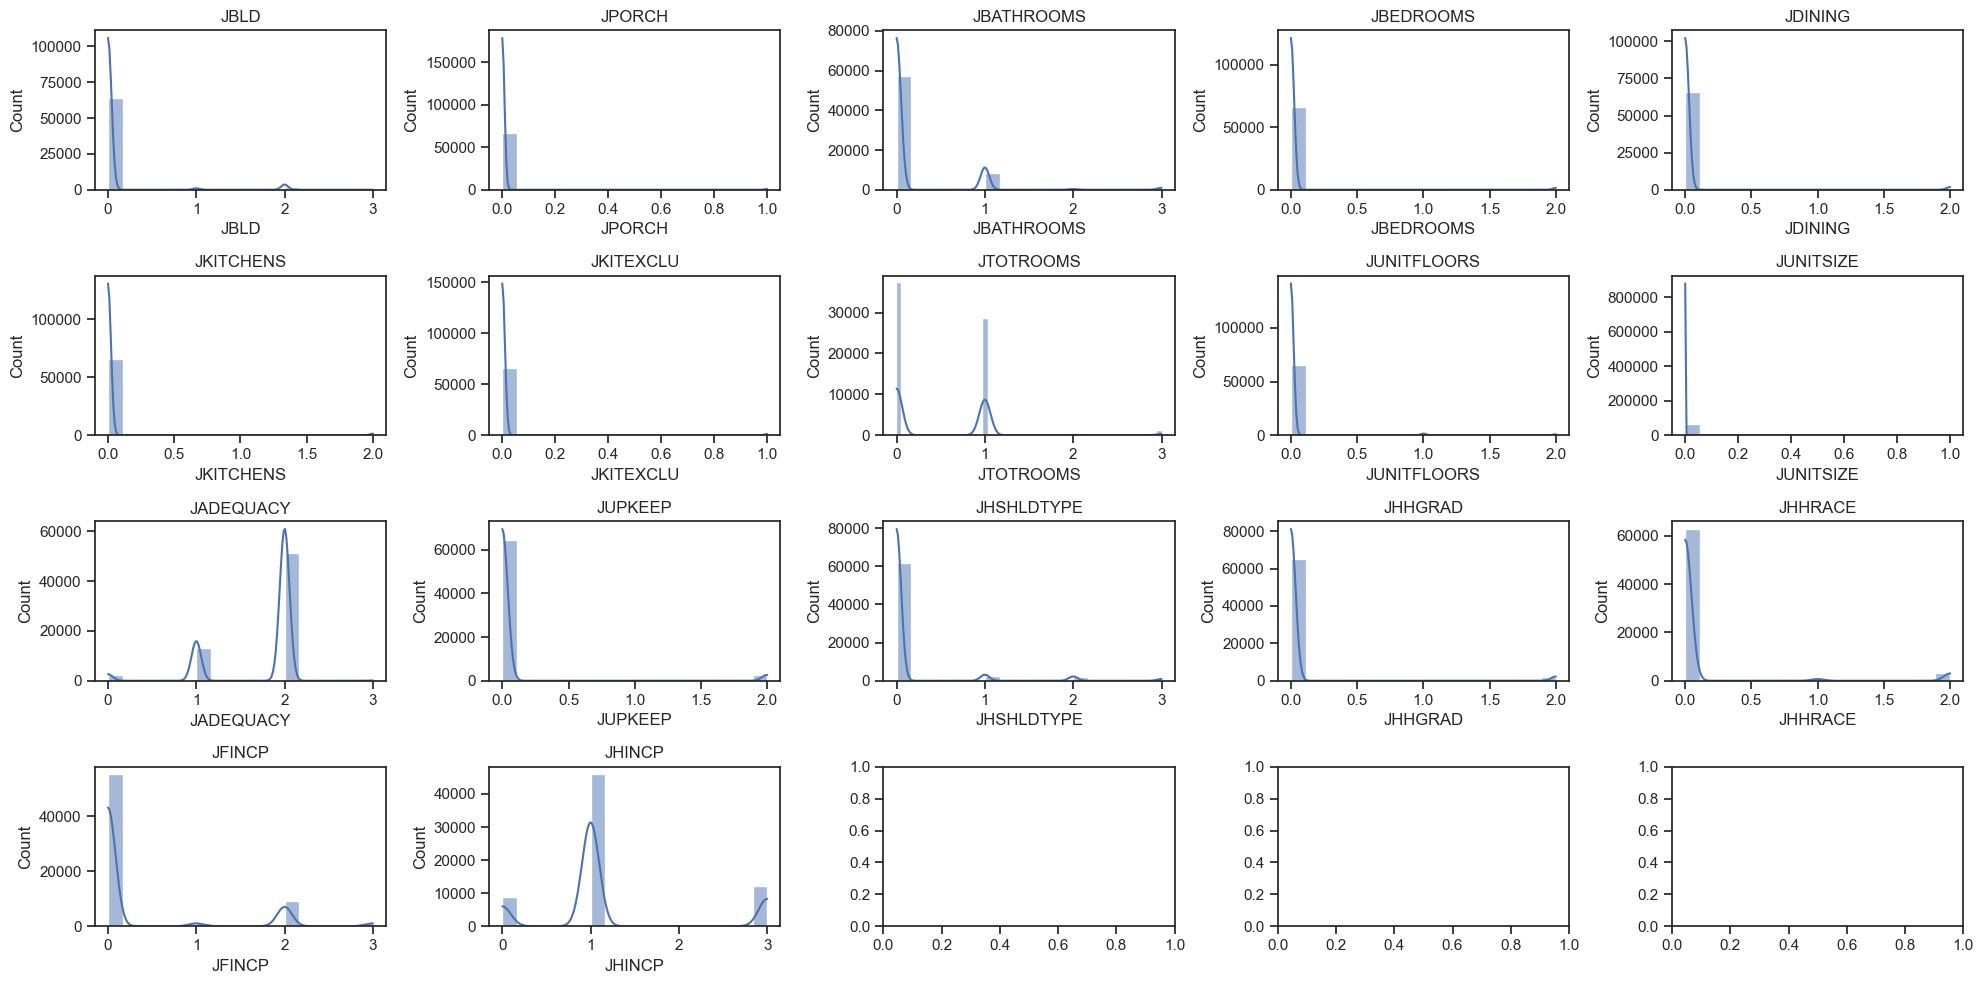

In [13]:
num_rows = 4
num_cols = 5
variable_names = list(var17.columns)
num_figures = len(variable_names)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))

for i, var_name in enumerate(variable_names):
    row_index = i // num_cols
    col_index = i % num_cols
    ax = axes[row_index, col_index]
    sns.histplot(data=var17[var_name], ax=ax, kde=True)
    ax.set_title(var_name)

plt.tight_layout()
plt.show()

/var/folders/vj/crlt_wk5433clrm0qp9q9f3w0000gn/T/ipykernel_20227/2067567665.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=var17['JHINCP'], shade=True)


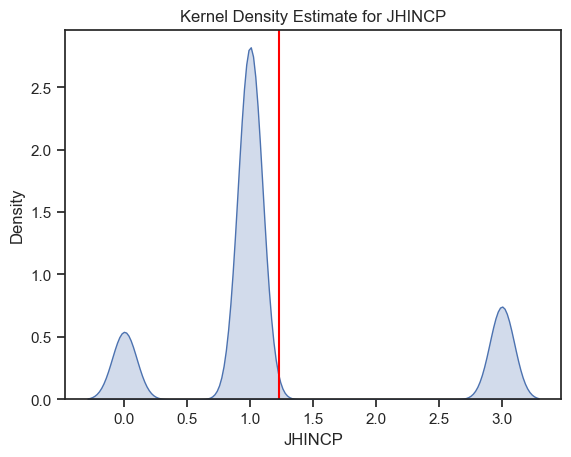

In [14]:
sns.kdeplot(data=var17['JHINCP'], shade=True)
mean_value = var17['JHINCP'].mean()
plt.axvline(x=mean_value, color='red')
plt.title(f"Kernel Density Estimate for {var_name}")
plt.show()

#### Preprocessing of data
To verify that variables are on the same scale, standardize the dataset. This is crucial for algorithms for hierarchical and distance-based grouping--> K-means.

In [15]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(var17)

Using the elbow method, which plots the inertia for different k-values and shows the "elbow point", we will see why using 3 clusters is optimal

/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress t

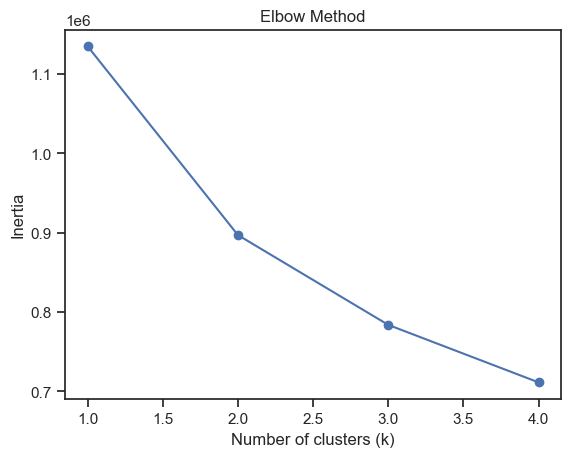

In [16]:
inertia = []
k_values = list(range(1, 5))
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [17]:
k = 3 
kmeans = KMeans(init="random",n_clusters=k,n_init=10,max_iter=300, random_state=42)
kmeans_clusters = kmeans.fit_predict(data_scaled)

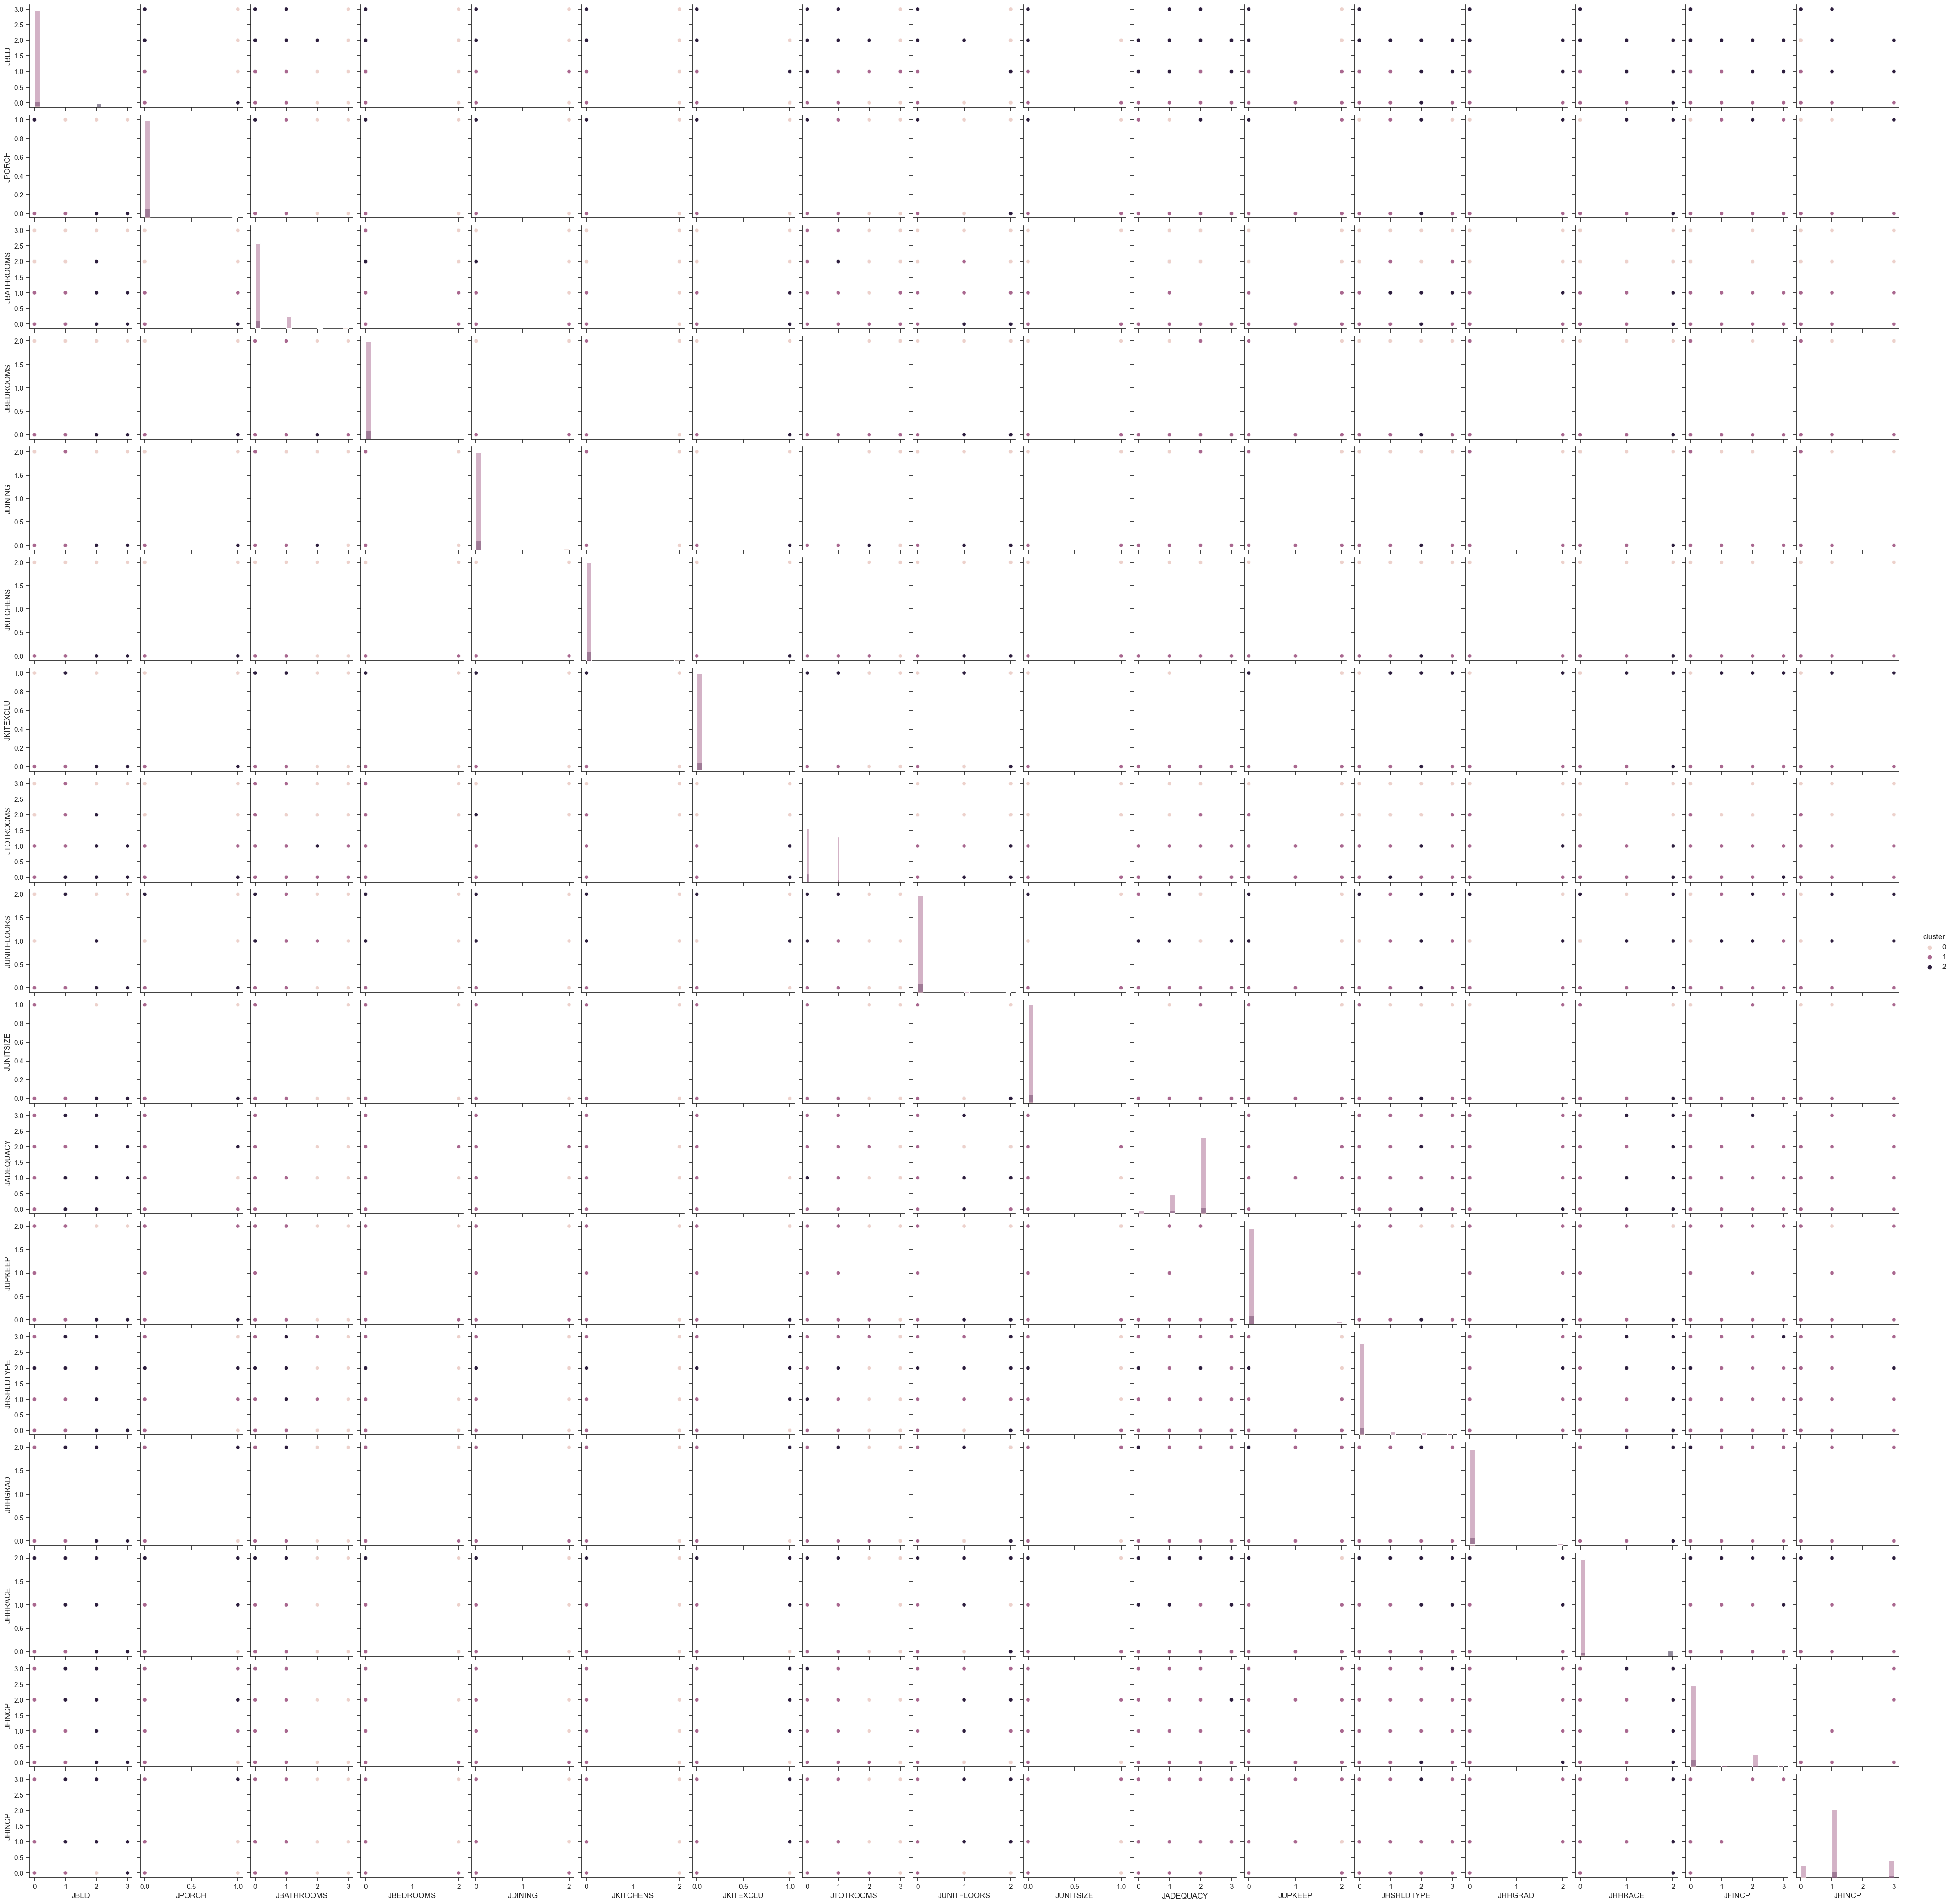

In [18]:
var17_clustered = var17.copy()
var17_clustered['cluster'] = kmeans_clusters
sns.pairplot(var17_clustered, hue='cluster', diag_kind='hist')
plt.show()

K-means Silhouette Score: 0.49860053142283417


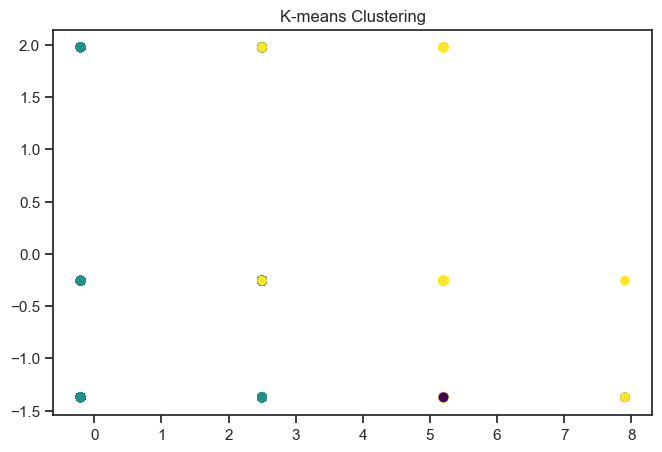

In [19]:
kmeans_silhouette = silhouette_score(data_scaled, kmeans_clusters)
print(f"K-means Silhouette Score: {kmeans_silhouette}")
plt.figure(figsize=(17, 5))
plt.subplot(1, 2, 1)
plt.scatter(data_scaled[:, 0], data_scaled[:, 16], c=kmeans_clusters, cmap='viridis')
plt.title('K-means Clustering')
plt.show()

In [20]:
var17_clustered['cluster'].value_counts()

1    60219
2     5678
0      855
Name: cluster, dtype: int64

In [21]:
mean_income = var17_clustered.groupby('cluster')['JHINCP'].mean()
print(mean_income)

cluster
0    0.313450
1    1.223368
2    1.441529
Name: JHINCP, dtype: float64


In [22]:
var17_clustered['cluster'] = var17_clustered['cluster'].replace({0:1, 1:2, 2:3})
var17_clustered['cluster'].value_counts()

2    60219
3     5678
1      855
Name: cluster, dtype: int64

# Sexual harrassment
There are 363,393 female victims of sexual harassment in 2017 in the US